# Trabalhando com os Dados de Crítica de Jogos 

In [1]:
import os
import pandas as pd
import numpy as np
import scipy 
from sklearn import linear_model
import statsmodels.api as sm
import patsy as ps


/Users/gabrielcs/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Importando dados dos Games

In [2]:
filepath = os.path.join('..', 'data', 'Video_Games_Sales_as_at_22_Dec_2016_.csv')
Games = pd.read_csv(filepath)

In [3]:
Games.head()


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


Fazer uma avaliação global sem considerar genero


Filtrando Jogos sem avaliação da crítica

In [4]:
Games2=Games[pd.notnull(Games['Critic_Score'])]
Games2.head(10)


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
11,Mario Kart DS,DS,2005.0,Racing,Nintendo,9.71,7.47,4.13,1.90,23.21,91.0,64.0,8.6,464.0,Nintendo,E
13,Wii Fit,Wii,2007.0,Sports,Nintendo,8.92,8.03,3.60,2.15,22.70,80.0,63.0,7.7,146.0,Nintendo,E
14,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,15.00,4.89,0.24,1.69,21.81,61.0,45.0,6.3,106.0,Good Science Studio,E
15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.01,8.49,2.53,1.77,21.79,80.0,33.0,7.4,52.0,Nintendo,E


Filtrando jogos sem dados de vendas (se existirem)

In [5]:
Games3=Games2[pd.notnull(Games2['Global_Sales'])]
Games3.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
11,Mario Kart DS,DS,2005.0,Racing,Nintendo,9.71,7.47,4.13,1.90,23.21,91.0,64.0,8.6,464.0,Nintendo,E
13,Wii Fit,Wii,2007.0,Sports,Nintendo,8.92,8.03,3.60,2.15,22.70,80.0,63.0,7.7,146.0,Nintendo,E
14,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,15.00,4.89,0.24,1.69,21.81,61.0,45.0,6.3,106.0,Good Science Studio,E
15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.01,8.49,2.53,1.77,21.79,80.0,33.0,7.4,52.0,Nintendo,E


In [6]:
X=Games3['Global_Sales']
Y=Games3['Critic_Count']
NP_X=np.array(X)
NP_Y=np.array(Y)
print(NP_X)
print(NP_Y)
corr = np.corrcoef(NP_X[:],NP_Y[:])
print("Correlation: " + str(corr))


[  8.25300000e+01   3.55200000e+01   3.27700000e+01 ...,   1.00000000e-02
   1.00000000e-02   1.00000000e-02]
[ 51.  73.  73. ...,  10.  12.   6.]
Correlation: [[ 1.          0.30357083]
 [ 0.30357083  1.        ]]


Rank Correlation - Spearman

In [7]:
X_rank=np.array(scipy.stats.stats.rankdata(X))
print(X_rank)

Y_rank=np.array(scipy.stats.stats.rankdata(Y))
print(Y_rank)

corr = np.corrcoef(X_rank[:],Y_rank[:])
print("Spearman Correlation: " + str(corr))

[ 8137.  8136.  8135. ...,    75.    75.    75.]
[ 7180.  7896.  7896. ...,  1656.  2127.   699.]
Spearman Correlation: [[ 1.          0.40846319]
 [ 0.40846319  1.        ]]


Será que filtrando para as vendas no japão isto acontece?

In [8]:
Games4=Games3[pd.notnull(Games3['JP_Sales'])]
Games4.head(500)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
11,Mario Kart DS,DS,2005.0,Racing,Nintendo,9.71,7.47,4.13,1.90,23.21,91.0,64.0,8.6,464.0,Nintendo,E
13,Wii Fit,Wii,2007.0,Sports,Nintendo,8.92,8.03,3.60,2.15,22.70,80.0,63.0,7.7,146.0,Nintendo,E
14,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,15.00,4.89,0.24,1.69,21.81,61.0,45.0,6.3,106.0,Good Science Studio,E
15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.01,8.49,2.53,1.77,21.79,80.0,33.0,7.4,52.0,Nintendo,E


In [9]:
X=Games4['JP_Sales']
Y=Games4['Critic_Count']
NP_X=np.array(X)
NP_Y=np.array(Y)
print(NP_X)
print(NP_Y)
corr = np.corrcoef(NP_X[:],NP_Y[:])
print("Correlation: " + str(corr))
X_rank=np.array(scipy.stats.stats.rankdata(X))
print(X_rank)

Y_rank=np.array(scipy.stats.stats.rankdata(Y))
print(Y_rank)

corr = np.corrcoef(X_rank[:],Y_rank[:])
print("Spearman Correlation: " + str(corr))

[ 3.77  3.79  3.28 ...,  0.    0.    0.  ]
[ 51.  73.  73. ...,  10.  12.   6.]
Correlation: [[ 1.          0.18021885]
 [ 0.18021885  1.        ]]
[ 8127.   8128.   8122.5 ...,  3022.   3022.   3022. ]
[ 7180.  7896.  7896. ...,  1656.  2127.   699.]
Spearman Correlation: [[ 1.          0.33864598]
 [ 0.33864598  1.        ]]


Será que isto muda por genero? Selecionarei RPG's

In [10]:
Games5=Games3[Games3['Genre']=="Role-Playing"].copy()
Games5.head(500)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
65,Final Fantasy VII,PS,1997.0,Role-Playing,Sony Computer Entertainment,3.01,2.47,3.28,0.96,9.72,92.0,20.0,9.2,1282.0,SquareSoft,T
75,The Elder Scrolls V: Skyrim,X360,2011.0,Role-Playing,Bethesda Softworks,5.05,2.79,0.10,0.85,8.79,96.0,89.0,8.4,3589.0,Bethesda Game Studios,M
84,Final Fantasy X,PS2,2001.0,Role-Playing,Sony Computer Entertainment,2.91,2.07,2.73,0.33,8.05,92.0,53.0,8.7,1056.0,SquareSoft,T
88,Final Fantasy VIII,PS,1999.0,Role-Playing,SquareSoft,2.28,1.72,3.63,0.23,7.86,90.0,24.0,8.6,644.0,SquareSoft,T
90,Pokémon Platinum Version,DS,2008.0,Role-Playing,Nintendo,2.76,1.72,2.69,0.54,7.72,83.0,46.0,8.5,203.0,Game Freak,E
105,Fallout 4,PS4,2015.0,Role-Playing,Bethesda Softworks,2.53,3.27,0.24,1.13,7.16,87.0,58.0,6.5,4228.0,Bethesda Game Studios,M
130,The Elder Scrolls V: Skyrim,PS3,2011.0,Role-Playing,Bethesda Softworks,2.55,2.60,0.25,1.00,6.41,92.0,16.0,6.4,2527.0,Bethesda Game Studios,M
131,Pokémon Emerald Version,GBA,2004.0,Role-Playing,Nintendo,2.57,1.58,2.06,0.21,6.41,76.0,28.0,9,222.0,Game Freak,E
132,Kingdom Hearts,PS2,2002.0,Role-Playing,Sony Computer Entertainment,3.64,1.20,1.49,0.07,6.40,85.0,46.0,8.8,597.0,SquareSoft,E
138,World of Warcraft,PC,2004.0,Role-Playing,Activision,0.08,6.21,0.00,0.00,6.29,93.0,57.0,7.3,2182.0,Blizzard Entertainment,T


In [11]:
X=Games5['Global_Sales']
Y=Games5['Critic_Count']
NP_X=np.array(X)
NP_Y=np.array(Y)
corr = np.corrcoef(NP_X[:],NP_Y[:])
print("Correlation: " + str(corr))

X_rank=np.array(scipy.stats.stats.rankdata(X))
Y_rank=np.array(scipy.stats.stats.rankdata(Y))

corr = np.corrcoef(X_rank[:],Y_rank[:])
print("Spearman Correlation: " + str(corr))

Correlation: [[ 1.        0.411564]
 [ 0.411564  1.      ]]
Spearman Correlation: [[ 1.          0.47282211]
 [ 0.47282211  1.        ]]


Com RPG's mudou o resultado será que não vale a pena filtrar dados mais recentes?

In [12]:
Games6=Games5[Games5['Year_of_Release'] > 2008]
Games6.head(500)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
75,The Elder Scrolls V: Skyrim,X360,2011.0,Role-Playing,Bethesda Softworks,5.05,2.79,0.10,0.85,8.79,96.0,89.0,8.4,3589.0,Bethesda Game Studios,M
105,Fallout 4,PS4,2015.0,Role-Playing,Bethesda Softworks,2.53,3.27,0.24,1.13,7.16,87.0,58.0,6.5,4228.0,Bethesda Game Studios,M
130,The Elder Scrolls V: Skyrim,PS3,2011.0,Role-Playing,Bethesda Softworks,2.55,2.60,0.25,1.00,6.41,92.0,16.0,6.4,2527.0,Bethesda Game Studios,M
152,Dragon Quest IX: Sentinels of the Starry Skies,DS,2009.0,Role-Playing,Nintendo,0.63,0.67,4.35,0.15,5.78,87.0,65.0,8.8,197.0,Level 5,E10+
173,Final Fantasy XIII,PS3,2009.0,Role-Playing,Square Enix,1.74,1.21,1.87,0.51,5.33,83.0,83.0,7.3,2483.0,Square Enix,T
192,Diablo III,PC,2012.0,Role-Playing,Activision,2.44,2.16,0.00,0.54,5.14,88.0,86.0,4,9629.0,Blizzard Entertainment,M
197,Fable III,X360,2010.0,Role-Playing,Microsoft Game Studios,3.59,1.08,0.05,0.38,5.10,80.0,88.0,6.5,604.0,Lionhead Studios,M
270,Fallout 4,XOne,2015.0,Role-Playing,Bethesda Softworks,2.51,1.32,0.01,0.38,4.22,88.0,39.0,6.2,1749.0,Bethesda Game Studios,M
292,Fallout: New Vegas,X360,2010.0,Role-Playing,Bethesda Softworks,2.66,1.03,0.04,0.33,4.05,84.0,81.0,8.1,769.0,Obsidian Entertainment,M
303,The Witcher 3: Wild Hunt,PS4,2015.0,Role-Playing,Namco Bandai Games,1.02,2.13,0.23,0.59,3.97,92.0,79.0,9.2,10179.0,CD Projekt Red Studio,M


In [13]:
X=Games6['Global_Sales']
Y=Games6['Critic_Count']
NP_X=np.array(X)
NP_Y=np.array(Y)
corr = np.corrcoef(NP_X[:],NP_Y[:])
print("Correlation: " + str(corr))

X_rank=np.array(scipy.stats.stats.rankdata(X))
Y_rank=np.array(scipy.stats.stats.rankdata(Y))

corr = np.corrcoef(X_rank[:],Y_rank[:])
print("Spearman Correlation: " + str(corr))

Correlation: [[ 1.          0.49759722]
 [ 0.49759722  1.        ]]
Spearman Correlation: [[ 1.          0.57764691]
 [ 0.57764691  1.        ]]


Chegamos a uma correlação boa, vamos ajustar uma Regressão Linear

In [14]:
# Create linear regression object
regr = linear_model.LinearRegression()
X_train=Y.values.reshape(len(Y),1)
Y_train=X.values.reshape(len(X),1)

# Train the model using the training sets
regr.fit(X_train, Y_train)

beta1=regr.coef_

intercepto=regr.intercept_

print(beta1)
print(intercepto)

#R quadrado 
regr.score(X_train,Y_train)

[[ 0.02715004]]
[-0.30078844]


0.24760299160661114

Eai, quais conclusões chegaram????

Utilizando o statmodels

In [15]:
Games5.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
65,Final Fantasy VII,PS,1997.0,Role-Playing,Sony Computer Entertainment,3.01,2.47,3.28,0.96,9.72,92.0,20.0,9.2,1282.0,SquareSoft,T
75,The Elder Scrolls V: Skyrim,X360,2011.0,Role-Playing,Bethesda Softworks,5.05,2.79,0.10,0.85,8.79,96.0,89.0,8.4,3589.0,Bethesda Game Studios,M
84,Final Fantasy X,PS2,2001.0,Role-Playing,Sony Computer Entertainment,2.91,2.07,2.73,0.33,8.05,92.0,53.0,8.7,1056.0,SquareSoft,T
88,Final Fantasy VIII,PS,1999.0,Role-Playing,SquareSoft,2.28,1.72,3.63,0.23,7.86,90.0,24.0,8.6,644.0,SquareSoft,T
90,Pokémon Platinum Version,DS,2008.0,Role-Playing,Nintendo,2.76,1.72,2.69,0.54,7.72,83.0,46.0,8.5,203.0,Game Freak,E


In [16]:
def troca(x):
    try:
        return float(x)
    except ValueError as err:
        return np.nan

Games5["User_Score"]=Games5["User_Score"].apply( troca ) 



In [17]:
y,X = ps.dmatrices('Global_Sales ~ Critic_Score + User_Score +Publisher',data=Games5, return_type='dataframe')
print(type(y))
Games5.head(500)


<class 'pandas.core.frame.DataFrame'>


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
65,Final Fantasy VII,PS,1997.0,Role-Playing,Sony Computer Entertainment,3.01,2.47,3.28,0.96,9.72,92.0,20.0,9.2,1282.0,SquareSoft,T
75,The Elder Scrolls V: Skyrim,X360,2011.0,Role-Playing,Bethesda Softworks,5.05,2.79,0.10,0.85,8.79,96.0,89.0,8.4,3589.0,Bethesda Game Studios,M
84,Final Fantasy X,PS2,2001.0,Role-Playing,Sony Computer Entertainment,2.91,2.07,2.73,0.33,8.05,92.0,53.0,8.7,1056.0,SquareSoft,T
88,Final Fantasy VIII,PS,1999.0,Role-Playing,SquareSoft,2.28,1.72,3.63,0.23,7.86,90.0,24.0,8.6,644.0,SquareSoft,T
90,Pokémon Platinum Version,DS,2008.0,Role-Playing,Nintendo,2.76,1.72,2.69,0.54,7.72,83.0,46.0,8.5,203.0,Game Freak,E
105,Fallout 4,PS4,2015.0,Role-Playing,Bethesda Softworks,2.53,3.27,0.24,1.13,7.16,87.0,58.0,6.5,4228.0,Bethesda Game Studios,M
130,The Elder Scrolls V: Skyrim,PS3,2011.0,Role-Playing,Bethesda Softworks,2.55,2.60,0.25,1.00,6.41,92.0,16.0,6.4,2527.0,Bethesda Game Studios,M
131,Pokémon Emerald Version,GBA,2004.0,Role-Playing,Nintendo,2.57,1.58,2.06,0.21,6.41,76.0,28.0,9.0,222.0,Game Freak,E
132,Kingdom Hearts,PS2,2002.0,Role-Playing,Sony Computer Entertainment,3.64,1.20,1.49,0.07,6.40,85.0,46.0,8.8,597.0,SquareSoft,E
138,World of Warcraft,PC,2004.0,Role-Playing,Activision,0.08,6.21,0.00,0.00,6.29,93.0,57.0,7.3,2182.0,Blizzard Entertainment,T


In [18]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     3.961
Date:                Thu, 29 Mar 2018   Prob (F-statistic):           9.35e-26
Time:                        20:27:31   Log-Likelihood:                -996.97
No. Observations:                 721   AIC:                             2190.
Df Residuals:                     623   BIC:                             2639.
Df Model:                          97                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

/Users/gabrielcs/anaconda/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1386: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,VIF Factor,features
0,823.8,Intercept
1,9.9,Publisher[T.505 Games]
2,2.0,Publisher[T.ASCII Entertainment]
3,2.0,Publisher[T.Acclaim Entertainment]
4,2.0,Publisher[T.Ackkstudios]
5,2.0,Publisher[T.Acquire]
6,33.4,Publisher[T.Activision]
7,5.0,Publisher[T.Aksys Games]
8,2.0,Publisher[T.Ascaron Entertainment GmbH]
9,2.0,Publisher[T.Aspyr]


In [20]:
Games.get_values()

array([['Wii Sports', 'Wii', 2006.0, ..., 322.0, 'Nintendo', 'E'],
       ['Super Mario Bros.', 'NES', 1985.0, ..., nan, nan, nan],
       ['Mario Kart Wii', 'Wii', 2008.0, ..., 709.0, 'Nintendo', 'E'],
       ..., 
       ['Haitaka no Psychedelica', 'PSV', 2016.0, ..., nan, nan, nan],
       ['Spirits & Spells', 'GBA', 2003.0, ..., nan, nan, nan],
       ['Winning Post 8 2016', 'PSV', 2016.0, ..., nan, nan, nan]], dtype=object)

Analise do Heatmap - mapa de calor

In [21]:
corr = Games6.corr()

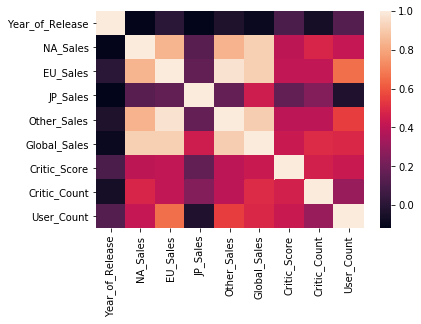

In [22]:
import seaborn as sns
%matplotlib inline

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)